# Mixtures of conjugate priors 01 - JAGS

## _Josep Fortiana_ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2023-03-27

## The spinning coin

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exp}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

In [1]:
#install.packages("R2jags",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(R2jags)

Loading required package: R2jags

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




## Data 

In [2]:
prior.alpha1<-10
prior.beta1<-20
prior.alpha2<-20
prior.beta2<-10
prior.gamma<-0.5

In [3]:
# Number of trials
n<-10
# Observed x
x.obs<-3

In [4]:
Mix.01.dat<-list(a1=prior.alpha1,b1=prior.beta1,a2=prior.alpha2,b2=prior.beta2,gamma=prior.gamma,n=n,x=x.obs)

## Model

In [5]:
cat(
"model
    {
    x~dbin(p,n)             # Binomial likelihood. See arguments order!
    
    p<-theta[r]             # Prior is a mixture of two beta r.v 
                            # Notice the syntax: this statement says that p is
                            # *equal to* the pair of theta variates defined below

    r~dcat(g[])             # Categorical distribution:
                            # g[] is a 2-vector containing the mixing probabilities (gamma, 1-gamma)

    theta[1]~dbeta(a1,b1)   # The two beta r.v to enter the mixture
    theta[2]~dbeta(a2,b2)

    g[1]<-gamma             # Just as in p. g is equal to (gamma, 1-gamma)
    g[2]<-1-gamma
    }"
    ,file="Mix.01.jag")

## Run JAGS

In [6]:
Mix.01.m1<-jags(data=Mix.01.dat, n.chains=3,n.iter=5000,n.burnin=500, 
        parameters.to.save=c("theta","p"), model.file="Mix.01.jag")

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 3
   Total graph size: 14

Initializing model



In [7]:
print(Mix.01.m1)

Inference for Bugs model at "Mix.01.jag", fit using jags,
 3 chains, each with 5000 iterations (first 500 discarded), n.thin = 4
 n.sims = 3375 iterations saved
         mu.vect sd.vect  2.5%   25%   50%   75% 97.5%  Rhat n.eff
p          0.353   0.107 0.190 0.280 0.335 0.399 0.638 1.001  3400
theta[1]   0.327   0.075 0.188 0.274 0.325 0.376 0.486 1.001  3400
theta[2]   0.656   0.088 0.482 0.597 0.661 0.721 0.815 1.001  3400
deviance   3.258   1.211 2.643 2.680 2.808 3.178 7.344 1.001  3400

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 0.7 and DIC = 4.0
DIC is an estimate of expected predictive error (lower deviance is better).


In [8]:
p.sample<-Mix.01.m1$BUGSoutput$sims.list$p

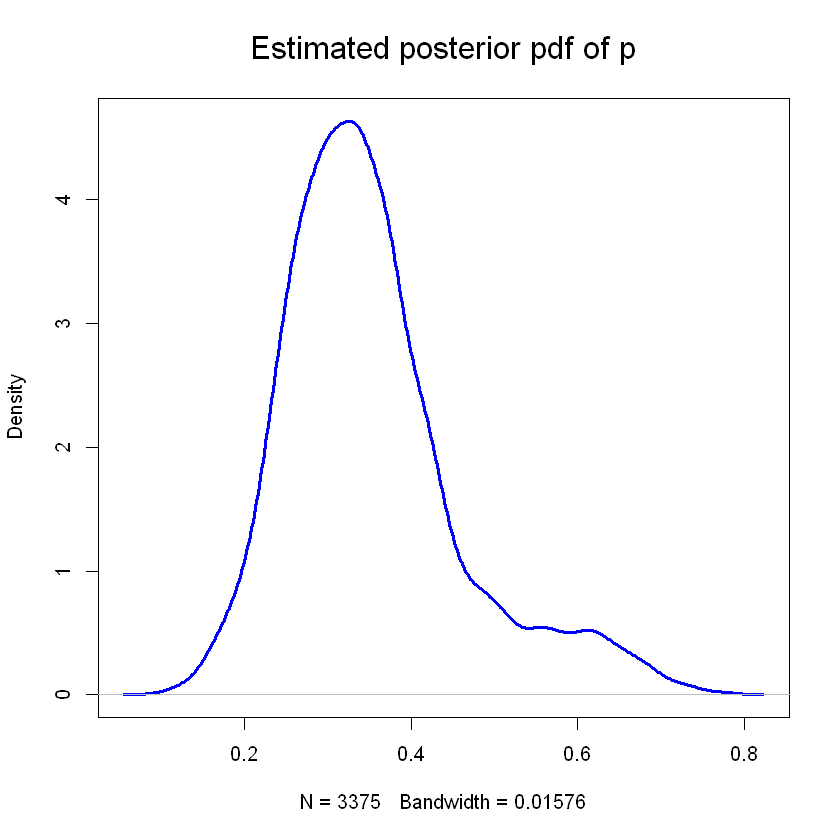

In [9]:
p.sample.density<-density(p.sample)
plot(p.sample.density,lwd=2.5,col="blue",main=expression(paste("Estimated posterior pdf of ",p)),cex.main=1.6)